### test_nc_grid_creation

Test routines for generating a netCDF ROMS grid file from x,y,z arrays.
This needs
* `grid.py`
* `ncdump.py`

In [109]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
%matplotlib inline

In [110]:
x=10

In [3]:
# load a netCDF file for reference

%run -i "ncdump.py"
fn = 'CCBay_FG3.nc'
#fn = "http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/aretxabaleta/CCBay/grids/CCBay_FG2.nc"
ncid = nc_fid = netCDF4.Dataset(fn, 'r')
nc_attrs, nc_dims, nc_vars = ncdump(ncid)

NetCDF Global Attributes:
	type: 'ROMS GRID file'
	gridid: 'theGridTitle'
	history: 'Created by create_roms_netcdf_grid_file, on 13-Jun-2019 08:42:44'
	title: 'ROMS Application'
NetCDF dimension information:
	Name: xi_psi
		size: 125
	Name: xi_rho
		size: 126
	Name: xi_u
		size: 125
	Name: xi_v
		size: 126
	Name: eta_psi
		size: 287
	Name: eta_rho
		size: 288
	Name: eta_u
		size: 288
	Name: eta_v
		size: 287
	Name: one
		size: 1
	Name: two
		size: 2
	Name: bath
		size: 1
NetCDF variable information:
	Name: xl
		dimensions: ('one',)
		size: 1
		type: dtype('float64')
		long_name: 'domain length in the XI-direction'
		units: 'meter'
	Name: el
		dimensions: ('one',)
		size: 1
		type: dtype('float64')
		long_name: 'domain length in the ETA-direction'
		units: 'meter'
	Name: JPRJ
		dimensions: ('two',)
		size: 2
		type: dtype('S1')
		long_name: 'Map projection type'
		option_ME: 'Mercator'
		option_ST: 'Stereographic'
		option_LC: 'Lambert conformal conic'
	Name: spherical
		dimensions: ('o

In [4]:
fn = "http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/aretxabaleta/CCBay/grids/CCBay_FG2.nc"
ncid = nc_fid = netCDF4.Dataset(fn, 'r')
nc_attrs, nc_dims, nc_vars = ncdump(ncid)

NetCDF Global Attributes:
	type: 'ROMS GRID file'
	gridid: 'theGridTitle'
	history: 'Created by create_roms_netcdf_grid_file, on 14-Feb-2019 10:24:09'
	title: 'ROMS Application'
	DODS.strlen: 1
	DODS.dimName: 'one'
NetCDF dimension information:
	Name: bath
		size: 1
	Name: eta_psi
		size: 125
	Name: eta_rho
		size: 126
	Name: eta_u
		size: 126
	Name: eta_v
		size: 125
	Name: maxStrlen64
		size: 64
	Name: one
		size: 1
	Name: xi_psi
		size: 287
	Name: xi_rho
		size: 288
	Name: xi_u
		size: 287
	Name: xi_v
		size: 288
NetCDF variable information:
	Name: xl
		dimensions: ('one',)
		size: 1
		type: dtype('float64')
		long_name: 'domain length in the XI-direction'
		units: 'meter'
	Name: el
		dimensions: ('one',)
		size: 1
		type: dtype('float64')
		long_name: 'domain length in the ETA-direction'
		units: 'meter'
	Name: JPRJ
		dimensions: ('maxStrlen64',)
		size: 64
		type: dtype('S1')
		long_name: 'Map projection type'
		option_ME: 'Mercator'
		option_ST: 'Stereographic'
		option_LC: 'Lamb

In [60]:
# test grid generation
%run -i "grid.py"
global_attributes = dict(strlen = 64)
Lm = 20
Mm = 10
create_roms_netcdf_grid_file('FGx',Lm,Mm,global_attributes,'NETCDF4')
nc_fid = netCDF4.Dataset('FGx.nc', 'r')
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
nc_fid.close()

New June 21, 2019
Generating  FGx.nc
NetCDF Global Attributes:
	gridname: 'FGx'
	type: 'ROMS GRID file'
	history: 'Created by create_roms_netcdf_grid_file.py in grid.py on June 21, 2019'
	title: 'ROMS application'
	Conventions: 'CF-1.2'
	strlen: 64
NetCDF dimension information:
	Name: xi_psi
		size: 21
	Name: xi_rho
		size: 22
	Name: xi_u
		size: 21
	Name: xi_v
		size: 22
	Name: eta_psi
		size: 11
	Name: eta_rho
		size: 12
	Name: eta_u
		size: 12
	Name: eta_v
		size: 11
	Name: maxStrlen64
		size: 64
	Name: one
		size: 1
	Name: two
		size: 2
	Name: bath
		size: 1
NetCDF variable information:
	Name: xl
		dimensions: ('one',)
		size: 1
		type: dtype('float64')
		long_name: 'domain length in the XI-direction'
		units: 'meter'
	Name: el
		dimensions: ('one',)
		size: 1
		type: dtype('float64')
		long_name: 'domain length in the ETA-direction'
		units: 'meter'
	Name: JPRJ
		dimensions: ('maxStrlen64',)
		size: 64
		type: dtype('S1')
		long_name: 'Map projection type'
		flag_values: 'option_M

In [59]:
nc_fid.close()

### Following are required for making grids
* lat/lon or x,y at rho points. Starting by assuming x, y in UTM EPSG:26919
* topo/bathy at rho points
* rho mask


In [39]:
### Build a test grid
import xarray as xr
# load some functions
%run -i "grid.py"

# make a sparse grid for testing
# approximate origin of the Sandwich fine grid
xp =  376170.
yp = 4625320.
alp = 130.-90. # orientation of x-axis relative to east
dx = 100.
dy = 100.
mxc = 20
myc = 10
X,Y = buildGrid(xp,yp,alp,dx,dy,mxc,myc)

# load the USGS jetyak data as a test dataset
# data directory
ddir = r"D:/crs/proj/2015_Sandwich/CCBay_Modeling/grid_data/"
fn = ddir+'2016-030-FA_bathymetry_4m.tif'
da = xr.open_rasterio(fn)

# Not sure how da.values got a singleton dimension, but squeeze gets rid of it.
print( np.shape(np.flipud(da['y'].values)), np.shape(da['x'].values), np.shape( np.flipud(da.values)) )

# However, make sure to squeeze before flipping
z4 = np.flipud(np.squeeze(da.values))

# Missing values are -3.40282347e+38. Replace with NaNs as follows:
z4[z4 <= -99]=np.NaN

x4 = da['x'].values
y4 = np.flipud(da['y'].values)

Shape of X and Y:  (10, 20) (10, 20)
(331,) (331,) (1, 331, 331)


<Figure size 432x288 with 0 Axes>

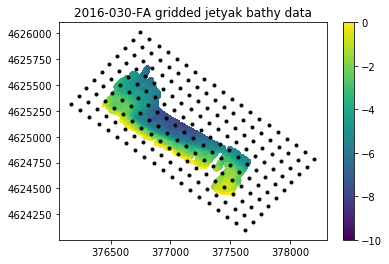

In [42]:
plt.pcolormesh(x4, y4, z4, vmin=-10,vmax=0)
plt.title('2016-030-FA gridded jetyak bathy data and test grid')
plt.plot(X,Y,'.k')
plt.colorbar();

In [46]:
# interpolate jetyak bathy onto grid
from scipy import interpolate
xp, yp = np.meshgrid(x4,y4)
xpyp = np.array((np.ravel(xp),np.ravel(yp))).T
zp = np.ravel(z4)
print('xp',np.shape(xp),'yp' ,np.shape(yp),'xpyp: ',np.shape(xpyp),'zp: :',np.shape(zp))
print('X ',np.shape(X),'Y: ' ,np.shape(Y),'grid points: ',np.shape(np.array((np.ravel(X), np.ravel(Y))).T))

# interpolate data on to fine grid
Z = interpolate.griddata( xpyp, zp, np.array((np.ravel(X), np.ravel(Y))).T, method='linear', fill_value=np.NaN, rescale=False)
Z = np.reshape(Z,np.shape(X))

xp (331, 331) yp (331, 331) xpyp:  (109561, 2) zp: : (109561,)
X  (10, 20) Y:  (10, 20) grid points:  (200, 2)


In [ ]:
### Following plot is not exactly correct.
The data should be centered around the X, Y points.

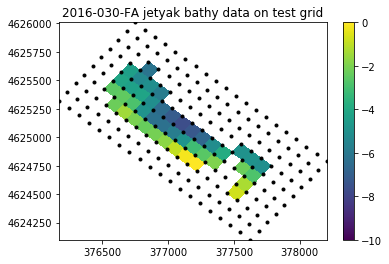

In [48]:
plt.pcolormesh(X[, Y, Z, vmin=-10,vmax=0)
plt.title('2016-030-FA jetyak bathy data on test grid')
plt.plot(X,Y,'.k')
plt.colorbar();

In [49]:
from pyproj import Proj, transform

outProj = Proj(init='epsg:4326') #WGS84
inProj = Proj(init='epsg:26919') #NAD83 UTM Zone 19N

outlon, outlat = transform(inProj, outProj, np.ravel(X), np.ravel(Y) )
Lat = np.reshape(outlat, np.shape(Y))
Lon = np.reshape(outlon, np.shape(X))

### Now generate the other arrays needed for a ROMS grid
 <img src="roms_grid.jpg">

In [61]:
Mm,Lm = np.shape(X) # rho-points
print('Mm:',Mm,'Lm:',Lm)
L, M = Lm+1, Mm+1
Lp, Mp = Lm+2, Mm+2

# load the dataset
nc = netCDF4.Dataset('FGx.nc')


Mm: 10 Lm: 20


In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
L, M = Lm+1, Mm+1
xlen = (mxc-1)*dx
ylen = (myc-1)*dy
print(xo,yo,dx,dy,xlen,ylen)

376170.0 4625320.0 100.0 100.0 1900.0 900.0


(22,) (12,)
Shape of X and Y:  (7, 8) (7, 8)


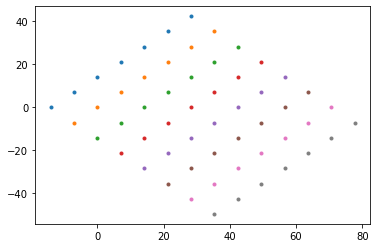

In [86]:
x = np.arange(xo-dx,xo+xlen+2.*dx,dx)
y = np.arange(yo-dy,yo+ylen+2.*dy,dy)
print(np.shape(x),np.shape(y))
%run "grid.py"
XX,YY = buildROMSGrid(0,0,45,10,10,6,5)
plt.plot(XX,YY,'.')

In [108]:
L, M = Lm+1, Mm+1
xlen = (Lm-1)*dx
ylen = (Mm-1)*dy

xu = np.arange(x[0]+dx/2.,x[-1]+dx/2,dx)
yu = np.tile( np.arange(y[0],y[-1],dy), (L,1) )
print(np.shape(xu),np.shape(yu))

print(M)
print(xu,yu)

(21, 11) (21, 11)
11
[[376120. 376120. 376120. 376120. 376120. 376120. 376120. 376120. 376120.
  376120. 376120.]
 [376220. 376220. 376220. 376220. 376220. 376220. 376220. 376220. 376220.
  376220. 376220.]
 [376320. 376320. 376320. 376320. 376320. 376320. 376320. 376320. 376320.
  376320. 376320.]
 [376420. 376420. 376420. 376420. 376420. 376420. 376420. 376420. 376420.
  376420. 376420.]
 [376520. 376520. 376520. 376520. 376520. 376520. 376520. 376520. 376520.
  376520. 376520.]
 [376620. 376620. 376620. 376620. 376620. 376620. 376620. 376620. 376620.
  376620. 376620.]
 [376720. 376720. 376720. 376720. 376720. 376720. 376720. 376720. 376720.
  376720. 376720.]
 [376820. 376820. 376820. 376820. 376820. 376820. 376820. 376820. 376820.
  376820. 376820.]
 [376920. 376920. 376920. 376920. 376920. 376920. 376920. 376920. 376920.
  376920. 376920.]
 [377020. 377020. 377020. 377020. 377020. 377020. 377020. 377020. 377020.
  377020. 377020.]
 [377120. 377120. 377120. 377120. 377120. 377120.